In [1]:
#imports libraries and packages

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:

import os
print("Current Working Directory:", os.getcwd())




Current Working Directory: C:\Users\mitra\codes\thesis


In [3]:

# Define file path
#file_path = "dataset/ed/diagnosis.csv"  # Remove 'thesis/' from the path
data_diagnosis = pd.read_csv('dataset/ed/diagnosis.csv')
data_edstays= pd.read_csv('dataset/ed/edstays.csv')
data_medrecon=pd.read_csv('dataset/ed/medrecon.csv')
data_pyxis=pd.read_csv('dataset/ed/pyxis.csv')
data_triage=pd.read_csv('dataset/ed/triage.csv')
data_vitalsign=pd.read_csv('dataset/ed/vitalsign.csv')

patients=pd.read_csv('dataset/ed/patients.csv')

In [4]:
data_edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED


In [5]:
data_triage.head()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [6]:
patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13


In [7]:
print("1----------------------------------")
print(data_diagnosis.columns)
print("2----------------------------------")
print(data_edstays.columns)
print("3----------------------------------")
print(data_medrecon.columns)
print("4----------------------------------")
print(data_pyxis.columns)
print("5----------------------------------")
print(data_triage.columns)
print("6----------------------------------")
print(data_vitalsign.columns)
print("***********************************************************************************************************")
print("***********************************************************************************************************")
print(data_edstays.columns)
print("----------------------------------")
print(data_triage.columns)
print("----------------------------------")
print(patients.columns)

1----------------------------------
Index(['subject_id', 'stay_id', 'seq_num', 'icd_code', 'icd_version',
       'icd_title'],
      dtype='object')
2----------------------------------
Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'gender',
       'race', 'arrival_transport', 'disposition'],
      dtype='object')
3----------------------------------
Index(['subject_id', 'stay_id', 'charttime', 'name', 'gsn', 'ndc', 'etc_rn',
       'etccode', 'etcdescription'],
      dtype='object')
4----------------------------------
Index(['subject_id', 'stay_id', 'charttime', 'med_rn', 'name', 'gsn_rn',
       'gsn'],
      dtype='object')
5----------------------------------
Index(['subject_id', 'stay_id', 'temperature', 'heartrate', 'resprate',
       'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint'],
      dtype='object')
6----------------------------------
Index(['subject_id', 'stay_id', 'charttime', 'temperature', 'heartrate',
       'resprate', 'o2sat', 'sbp', 'dbp', '

In [8]:
print("1----------------------------------")
print(len(data_diagnosis))
print("2----------------------------------")
print(len(data_edstays))
print("3----------------------------------")
print(len(data_medrecon))
print("4----------------------------------")
print(len(data_pyxis))
print("5----------------------------------")
print(len(data_triage))
print("6----------------------------------")
print(len(data_vitalsign))

print("***********************************************************************************************************")
print("***********************************************************************************************************")
print(len(data_edstays))
print("----------------------------------")
print(len(data_triage))
print("----------------------------------")
print(len(patients))

1----------------------------------
899050
2----------------------------------
425087
3----------------------------------
2987342
4----------------------------------
1586053
5----------------------------------
425087
6----------------------------------
1564610
***********************************************************************************************************
***********************************************************************************************************
425087
----------------------------------
425087
----------------------------------
364627


In [9]:
print("Unique subject_id in data_vitalsign:", data_vitalsign['subject_id'].nunique())
print("Unique subject_id in data_edstays:", data_edstays['subject_id'].nunique())

print("Unique stay_id in data_vitalsign:", data_vitalsign['stay_id'].nunique())
print("Unique stay_id in data_edstays:", data_edstays['stay_id'].nunique())


Unique subject_id in data_vitalsign: 198131
Unique subject_id in data_edstays: 205504
Unique stay_id in data_vitalsign: 408146
Unique stay_id in data_edstays: 425087


In [12]:

# Select relevant columns from each dataset
edstays_selected = data_edstays[['subject_id', 'intime', 'gender', 'race']]
triage_selected = data_triage[['subject_id', 'chiefcomplaint']]
patients_selected = patients[['subject_id', 'anchor_age', 'dod']]

# Merge datasets on 'subject_id'
merged_data = edstays_selected.merge(triage_selected, on='subject_id', how='left')
merged_data = merged_data.merge(patients_selected, on='subject_id', how='left')


In [13]:
merged_data.head()

,subject_id,intime,gender,race,chiefcomplaint,anchor_age,dod
0,10000032,2180-05-06 19:17:00,F,WHITE,Hypotension,52.0,2180-09-09
1,10000032,2180-05-06 19:17:00,F,WHITE,"Abd pain, Abdominal distention",52.0,2180-09-09
2,10000032,2180-05-06 19:17:00,F,WHITE,"n/v/d, Abd pain",52.0,2180-09-09
3,10000032,2180-05-06 19:17:00,F,WHITE,Abdominal distention,52.0,2180-09-09
4,10000032,2180-05-06 19:17:00,F,WHITE,"Abdominal distention, Abd pain, LETHAGIC",52.0,2180-09-09


In [14]:
merged_data.columns

Index(['subject_id', 'intime', 'gender', 'race', 'chiefcomplaint',
       'anchor_age', 'dod'],
      dtype='object')

In [15]:
len(merged_data)

3297455

In [16]:
# Get a summary of the dataset
summary = merged_data.describe(include='all')

# Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Display the summary and missing values
print("Dataset Summary:")
print(summary)

print("\nMissing Values in Each Column:")
print(missing_values)

Dataset Summary:
          subject_id               intime   gender     race chiefcomplaint  \
count   3.297455e+06              3297455  3297455  3297455        3297354   
unique           NaN               422817        2       33          60406   
top              NaN  2161-06-10 15:46:00        M    WHITE           ETOH   
freq             NaN                  356  1720544  1525569         162844   
mean    1.507415e+07                  NaN      NaN      NaN            NaN   
std     2.799059e+06                  NaN      NaN      NaN            NaN   
min     1.000003e+07                  NaN      NaN      NaN            NaN   
25%     1.267753e+07                  NaN      NaN      NaN            NaN   
50%     1.533576e+07                  NaN      NaN      NaN            NaN   
75%     1.742094e+07                  NaN      NaN      NaN            NaN   
max     1.999999e+07                  NaN      NaN      NaN            NaN   

          anchor_age         dod  
count   3.2

In [17]:
# Check the data type of 'intime' and 'dod'
print("Before conversion:")
print(merged_data.dtypes[['intime', 'dod']])

Before conversion:
intime    object
dod       object
dtype: object


In [18]:
# Ensure 'intime' and 'dod' are in datetime format
merged_data['intime'] = pd.to_datetime(merged_data['intime'], errors='coerce')
merged_data['dod'] = pd.to_datetime(merged_data['dod'], errors='coerce')

# Check the data types after conversion
print("After converAsion:")
print(merged_data.dtypes[['intime', 'dod']])

After converAsion:
intime    datetime64[ns]
dod       datetime64[ns]
dtype: object


In [19]:

# Compute 'diedWithin30days' (handling missing dod values properly)
merged_data['diedWithin30days'] = (merged_data['dod'] - merged_data['intime']).dt.days <= 30

# Convert NaN values in 'diedWithin30days' to False (if no 'dod' date, the patient didn't die)
merged_data['diedWithin30days'] = merged_data['diedWithin30days'].fillna(False)

# Check the distribution of values in 'diedWithin30days'
print(merged_data['diedWithin30days'].value_counts())


diedWithin30days
False    3258143
True       39312
Name: count, dtype: int64


In [20]:
merged_data['diedWithin30days'].head()

0    False
1    False
2    False
3    False
4    False
Name: diedWithin30days, dtype: bool

In [21]:
# Convert boolean to integer (0 = False, 1 = True)
merged_data['died_in_30days'] = merged_data['diedWithin30days'].astype(int)

# Calculate number of days until death (or NaN if still alive)
merged_data['exact_day_of_death'] = (merged_data['dod'] - merged_data['intime']).dt.days

# Show a sample
merged_data[['subject_id', 'intime', 'dod', 'diedWithin30days', 'died_in_30days', 'exact_day_of_death']].head()


,subject_id,intime,dod,diedWithin30days,died_in_30days,exact_day_of_death
0,10000032,2180-05-06 19:17:00,2180-09-09,False,0,125.0
1,10000032,2180-05-06 19:17:00,2180-09-09,False,0,125.0
2,10000032,2180-05-06 19:17:00,2180-09-09,False,0,125.0
3,10000032,2180-05-06 19:17:00,2180-09-09,False,0,125.0
4,10000032,2180-05-06 19:17:00,2180-09-09,False,0,125.0


In [39]:
# Check for missing values in each column
missing_values = merged_data.isnull().sum()

print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
subject_id                  0
intime                      0
gender                      0
race                        0
chiefcomplaint            101
anchor_age                258
dod                   2298246
diedWithin30days            0
died_in_30days              0
exact_day_of_death    2298246
dtype: int64


In [41]:
# Fill chief complaint with 'unknown' (101 missing)
merged_data['chiefcomplaint'] = merged_data['chiefcomplaint'].fillna("unknown")

# Fill anchor_age with median (258 missing)
merged_data['anchor_age'] = merged_data['anchor_age'].fillna(merged_data['anchor_age'].median())

# Optional: Fill NaNs in exact_day_of_death with -1  (exact_day_of_death (also 2.3M missing))
merged_data['exact_day_of_death'] = merged_data['exact_day_of_death'].fillna(-1)




In [43]:
# 
study_end_date = pd.to_datetime('2212-12-31')
merged_data['last_known_alive'] = merged_data['dod'].fillna(study_end_date)
merged_data['follow_up_days'] = (merged_data['last_known_alive'] - merged_data['intime']).dt.days


In [45]:
#  Create an age group variable with a category for unknown
merged_data['age_group'] = pd.cut(merged_data['anchor_age'], 
                          bins=[0, 30, 45, 65, 80, 120], 
                          labels=['18-30', '31-45', '46-65', '66-80', '80+'])
merged_data['age_group'] = merged_data['age_group'].cat.add_categories(['Unknown'])
merged_data.loc[merged_data['anchor_age'].isnull(), 'age_group'] = 'Unknown'



In [47]:
merged_data.head()

,subject_id,intime,gender,race,chiefcomplaint,anchor_age,dod,diedWithin30days,died_in_30days,exact_day_of_death,last_known_alive,follow_up_days,age_group
0,10000032,2180-05-06 19:17:00,F,WHITE,Hypotension,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65
1,10000032,2180-05-06 19:17:00,F,WHITE,"Abd pain, Abdominal distention",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65
2,10000032,2180-05-06 19:17:00,F,WHITE,"n/v/d, Abd pain",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65
3,10000032,2180-05-06 19:17:00,F,WHITE,Abdominal distention,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65
4,10000032,2180-05-06 19:17:00,F,WHITE,"Abdominal distention, Abd pain, LETHAGIC",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65


In [49]:
# Check the distribution of outcomes
print("Patients who died within 30 days:", merged_data['died_in_30days'].sum())
print("Percentage who died within 30 days:", 
      round(merged_data['died_in_30days'].mean() * 100, 2), "%")

# Check that our missing value counts are now zero
print("\nMissing values after processing:")
for col in ['chiefcomplaint', 'anchor_age', 'died_in_30days']:
    print(f"{col}: {merged_data[col].isnull().sum()}")

Patients who died within 30 days: 39312
Percentage who died within 30 days: 1.19 %

Missing values after processing:
chiefcomplaint: 0
anchor_age: 0
died_in_30days: 0


In [51]:
merged_data.columns

Index(['subject_id', 'intime', 'gender', 'race', 'chiefcomplaint',
       'anchor_age', 'dod', 'diedWithin30days', 'died_in_30days',
       'exact_day_of_death', 'last_known_alive', 'follow_up_days',
       'age_group'],
      dtype='object')

In [53]:
print("Patients with recorded DOD:", merged_data['dod'].notnull().sum())


Patients with recorded DOD: 999209


In [55]:
# Check data types of each column
print("Data types:")
print(merged_data.dtypes)

# Check unique values in categorical columns
print("\nUnique gender values:")
print(merged_data['gender'].unique())
print("Count of unique gender values:", len(merged_data['gender'].unique()))

print("\nUnique race values:")
print(merged_data['race'].unique())
print("Count of unique race values:", len(merged_data['race'].unique()))

# Check unique values in chief complaints
print("\nCount of unique chief complaints:")
print(len(merged_data['chiefcomplaint'].unique()))
print("Most common chief complaints (top 10):")
print(merged_data['chiefcomplaint'].value_counts().head(10))

# Check the distribution of the mortality columns
print("\nMortality column distribution:")
print("diedWithin30days:\n", merged_data['diedWithin30days'].value_counts())
print("died_in_30days:\n", merged_data['died_in_30days'].value_counts())

# Check age distribution
print("\nAge statistics:")
print(merged_data['anchor_age'].describe())

# Check date range issues
print("\nDate range for intime:")
print("Earliest:", merged_data['intime'].min())
print("Latest:", merged_data['intime'].max())

# Corrected section for death date range
if merged_data['dod'].notnull().any():
    print("\nDate range for date of death (for those who died):")
    print("Earliest:", merged_data.loc[merged_data['dod'].notnull(), 'dod'].min())
    print("Latest:", merged_data.loc[merged_data['dod'].notnull(), 'dod'].max())


Data types:
subject_id                     int64
intime                datetime64[ns]
gender                        object
race                          object
chiefcomplaint                object
anchor_age                   float64
dod                   datetime64[ns]
diedWithin30days                bool
died_in_30days                 int32
exact_day_of_death           float64
last_known_alive      datetime64[ns]
follow_up_days                 int64
age_group                   category
dtype: object

Unique gender values:
['F' 'M']
Count of unique gender values: 2

Unique race values:
['WHITE' 'ASIAN' 'OTHER' 'ASIAN - SOUTH EAST ASIAN' 'UNKNOWN'
 'BLACK/AFRICAN AMERICAN' 'ASIAN - CHINESE' 'WHITE - RUSSIAN'
 'BLACK/CAPE VERDEAN' 'PORTUGUESE' 'MULTIPLE RACE/ETHNICITY'
 'UNABLE TO OBTAIN' 'WHITE - OTHER EUROPEAN' 'HISPANIC/LATINO - DOMINICAN'
 'HISPANIC/LATINO - SALVADORAN' 'HISPANIC/LATINO - PUERTO RICAN'
 'WHITE - BRAZILIAN' 'HISPANIC/LATINO - GUATEMALAN'
 'BLACK/CARIBBEAN ISLAND' 'HI

In [57]:
# Group by gender and diedWithin30days to get basic statistics
gender_stats = merged_data.groupby(['gender', 'diedWithin30days']).size().unstack()

# Rename columns for clarity
gender_stats.columns = ['Survived (False)', 'Died within 30 days (True)']

# Add total counts and percentage columns
gender_stats['Total'] = gender_stats.sum(axis=1)
gender_stats['Death Rate (%)'] = (gender_stats['Died within 30 days (True)'] / gender_stats['Total']) * 100




<Figure size 800x500 with 0 Axes>

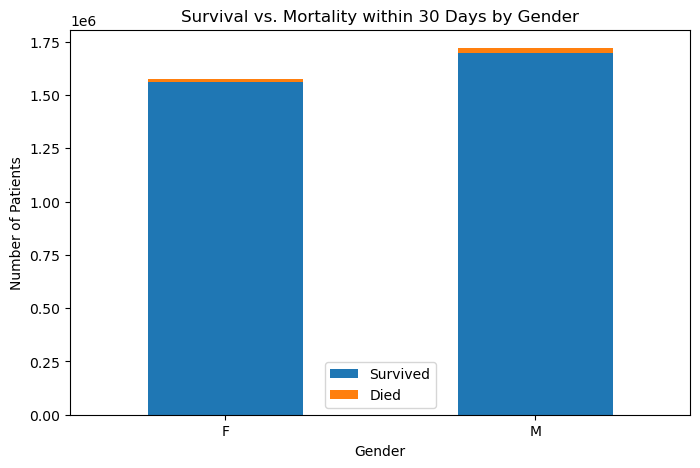

In [59]:
# Plot gender-based survival statistics
plt.figure(figsize=(8, 5))
gender_stats[['Survived (False)', 'Died within 30 days (True)']].plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title("Survival vs. Mortality within 30 Days by Gender")
plt.legend(["Survived", "Died"])
plt.xticks(rotation=0)
plt.show()


In [61]:
# Get complete list of unique race values with their counts
race_distribution = merged_data['race'].value_counts(dropna=False)
print("All unique race values in the dataset:")
print(race_distribution)

All unique race values in the dataset:
race
WHITE                                        1525569
BLACK/AFRICAN AMERICAN                       1054325
HISPANIC/LATINO - PUERTO RICAN                152301
OTHER                                          90398
HISPANIC/LATINO - DOMINICAN                    63675
BLACK/AFRICAN                                  48899
BLACK/CAPE VERDEAN                             47547
WHITE - OTHER EUROPEAN                         43821
WHITE - RUSSIAN                                38512
ASIAN - CHINESE                                30691
HISPANIC OR LATINO                             30044
BLACK/CARIBBEAN ISLAND                         25205
ASIAN                                          17726
PORTUGUESE                                     15634
HISPANIC/LATINO - GUATEMALAN                   11940
HISPANIC/LATINO - HONDURAN                     11003
UNKNOWN                                        10717
HISPANIC/LATINO - SALVADORAN                   10059
AS

In [ ]:
'''
def map_race_standard(race):
    if pd.isna(race):
        return 'Unknown/Not Reported'
    
    # Create mapping based on standard classifications
    standard_race_mapping = {
        # White variations
        'WHITE': 'White',
        'WHITE - OTHER EUROPEAN': 'White',
        'WHITE - RUSSIAN': 'White',
        'WHITE - EASTERN EUROPEAN': 'White',
        'WHITE - BRAZILIAN': 'White',
        'PORTUGUESE': 'White',
        
        # Black variations
        'BLACK/AFRICAN AMERICAN': 'Black/African American',
        'BLACK/AFRICAN': 'Black/African American',
        'BLACK/CAPE VERDEAN': 'Black/African American',
        'BLACK/CARIBBEAN ISLAND': 'Black/African American',
        
        # Hispanic/Latino variations (typically considered an ethnicity, not a race)
        'HISPANIC/LATINO - PUERTO RICAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - DOMINICAN': 'Hispanic/Latino',
        'HISPANIC OR LATINO': 'Hispanic/Latino',
        'HISPANIC/LATINO - GUATEMALAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - HONDURAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - SALVADORAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - CUBAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - COLUMBIAN': 'Hispanic/Latino',
        'SOUTH AMERICAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - MEXICAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - CENTRAL AMERICAN': 'Hispanic/Latino',
        
        # Asian variations
        'ASIAN - CHINESE': 'Asian',
        'ASIAN': 'Asian',
        'ASIAN - SOUTH EAST ASIAN': 'Asian',
        'ASIAN - ASIAN INDIAN': 'Asian',
        'ASIAN - KOREAN': 'Asian',
        
        # Native American/Alaska Native
        'AMERICAN INDIAN/ALASKA NATIVE': 'American Indian/Alaska Native',
        
        # Native Hawaiian/Pacific Islander
        'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Native Hawaiian/Pacific Islander',
        
        # Multiple race
        'MULTIPLE RACE/ETHNICITY': 'Multiple Races',
        
        # Other/Unknown/Not reported
        'OTHER': 'Other',
        'UNKNOWN': 'Unknown/Not Reported',
        'PATIENT DECLINED TO ANSWER': 'Unknown/Not Reported',
        'UNABLE TO OBTAIN': 'Unknown/Not Reported',
        
    }
    
    return standard_race_mapping.get(race, 'Other/Unknown/Not Reported')

# Apply the mapping to create a new column
merged_data['race_standard'] = merged_data['race'].apply(map_race_standard)

# Display the new distribution
race_standard_distribution = merged_data['race_standard'].value_counts()
print("\nStandard race categories:")
print(race_standard_distribution)

# Calculate percentage of each group
race_standard_percentage = merged_data['race_standard'].value_counts(normalize=True) * 100
print("\nPercentage distribution of standard race categories:")
print(race_standard_percentage.round(2))
'''

In [63]:
def map_race_standard(race):
    if pd.isna(race):
        return 'Other/Unknown/Not Reported'
    
    standard_race_mapping = {
        # White variations
        'WHITE': 'White',
        'WHITE - OTHER EUROPEAN': 'White',
        'WHITE - RUSSIAN': 'White',
        'WHITE - EASTERN EUROPEAN': 'White',
        'WHITE - BRAZILIAN': 'White',
        'PORTUGUESE': 'White',
        
        # Black variations
        'BLACK/AFRICAN AMERICAN': 'Black',
        'BLACK/AFRICAN': 'Black',
        'BLACK/CAPE VERDEAN': 'Black',
        'BLACK/CARIBBEAN ISLAND': 'Black',
        
        # Hispanic/Latino variations
        'HISPANIC/LATINO - PUERTO RICAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - DOMINICAN': 'Hispanic/Latino',
        'HISPANIC OR LATINO': 'Hispanic/Latino',
        'HISPANIC/LATINO - GUATEMALAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - HONDURAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - SALVADORAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - CUBAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - COLUMBIAN': 'Hispanic/Latino',
        'SOUTH AMERICAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - MEXICAN': 'Hispanic/Latino',
        'HISPANIC/LATINO - CENTRAL AMERICAN': 'Hispanic/Latino',
        
        # Asian variations
        'ASIAN - CHINESE': 'Asian',
        'ASIAN': 'Asian',
        'ASIAN - SOUTH EAST ASIAN': 'Asian',
        'ASIAN - ASIAN INDIAN': 'Asian',
        'ASIAN - KOREAN': 'Asian',
        
        # Native American/Alaska Native
        'AMERICAN INDIAN/ALASKA NATIVE': 'American Indian/Alaska Native',
        
        # Native Hawaiian/Pacific Islander
        'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Native Hawaiian/Pacific Islander',
        
        # Multiple race
        'MULTIPLE RACE/ETHNICITY': 'Multiple Races',
        
        # Other/Unknown/Not Reported (all grouped)
        'OTHER': 'Other/Unknown/Not Reported',
        'UNKNOWN': 'Other/Unknown/Not Reported',
        'PATIENT DECLINED TO ANSWER': 'Other/Unknown/Not Reported',
        'UNABLE TO OBTAIN': 'Other/Unknown/Not Reported',
    }
    
    return standard_race_mapping.get(race, 'Other/Unknown/Not Reported')


In [65]:
# Apply mapping
merged_data['race_standard'] = merged_data['race'].apply(map_race_standard)

# Show count distribution
race_standard_distribution = merged_data['race_standard'].value_counts()
print("\nStandard race categories:")
print(race_standard_distribution)

# Show percentage distribution
race_standard_percentage = merged_data['race_standard'].value_counts(normalize=True) * 100
print("\nPercentage distribution of standard race categories:")
print(race_standard_percentage.round(2))



Standard race categories:
race_standard
White                               1635463
Black                               1175976
Hispanic/Latino                      309411
Other/Unknown/Not Reported           103162
Asian                                 64566
American Indian/Alaska Native          5466
Native Hawaiian/Pacific Islander       2000
Multiple Races                         1411
Name: count, dtype: int64

Percentage distribution of standard race categories:
race_standard
White                               49.60
Black                               35.66
Hispanic/Latino                      9.38
Other/Unknown/Not Reported           3.13
Asian                                1.96
American Indian/Alaska Native        0.17
Native Hawaiian/Pacific Islander     0.06
Multiple Races                       0.04
Name: proportion, dtype: float64


In [66]:
# Sample random chief complaints to get a sense of variation
random_complaints = merged_data['chiefcomplaint'].sample(20)
print("Random sample of chief complaints:")
print(random_complaints)

# Look at the most common chief complaints
top_complaints = merged_data['chiefcomplaint'].value_counts().head(30)
print("\nTop 30 most common chief complaints:")
print(top_complaints)

# Look at some complaints in the middle of the frequency distribution
mid_freq_complaints = merged_data['chiefcomplaint'].value_counts().iloc[100:120]
print("\nMid-frequency chief complaints (rank 100-120):")
print(mid_freq_complaints)

# Look at some of the least common complaints
rare_complaints = merged_data['chiefcomplaint'].value_counts().tail(20)
print("\nSome of the least common chief complaints:")
print(rare_complaints)

# Check for patterns with specific words
for term in ['pain', 'chest', 'abdominal', 'fall', 'head', 'breath']:
    count = merged_data['chiefcomplaint'].str.contains(term, case=False, na=False).sum()
    print(f"Complaints containing '{term}': {count}")

Random sample of chief complaints:
1212555                             Abd pain, Rash
2381308                                 DARK URINE
1211162                             Depression, SI
2414977                                         SI
1945853                                   Headache
108127                             FEVER, VOMITING
1992812                      Dizziness, R Headache
777236     Buttock pain, R Shoulder pain, s/p Fall
1916422                                   Abd pain
1137997                         Vomiting, Abd pain
786655                                    S/P FALL
1412581                        Asthma exacerbation
867144                             Suprapubic pain
2711143                                  Dizziness
3057214                             Cough, Dyspnea
807596                                    S/P FALL
242656                           ETOH INTOXICATION
1785388                                       ETOH
529241                 Fever, Lower abdominal p

In [68]:
snomed_df = pd.read_csv("dataset/ed/snomed.csv")  # Update path if needed
snomed_df.columns = ['count', 'text', 'snomed']
snomed_df['text'] = snomed_df['text'].str.strip().str.lower()
snomed_df = snomed_df.dropna(subset=['snomed'])

# Create lookup dictionary
snomed_lookup = dict(zip(snomed_df['text'], snomed_df['snomed']))


In [69]:
def clean_chief_complaint(text):
    if pd.isna(text):
        return []

    # Lowercase and remove unwanted characters
    text = text.lower()
    text = re.sub(r"[\'\"+\?]", "", text)

    # Remove directional terms
    directional_terms = [
        r"\bllq\s*", r"\brlq\s*", r"\bluq\s*", r"\bruq\s*",
        r"\bl\s*", r"\br\s*", r"\blower\s*", r"\bupper\s*"
    ]
    for pattern in directional_terms:
        text = re.sub(pattern, "", text)

    # Normalize terminology
    text = re.sub(r"\babdominal\b", "abd", text)

    # Split on comma to handle multiple complaints
    return [t.strip() for t in text.split(",") if t.strip()]


In [70]:
def map_to_snomed(complaints):
    return [snomed_lookup[term] for term in complaints if term in snomed_lookup]

# Clean and map
merged_data['chiefcomplaint_cleaned'] = merged_data['chiefcomplaint'].apply(clean_chief_complaint)
merged_data['snomed_codes'] = merged_data['chiefcomplaint_cleaned'].apply(map_to_snomed)


In [71]:
merged_data['snomed_primary'] = merged_data['snomed_codes'].apply(lambda x: x[0] if x else None)

In [72]:
merged_data[['chiefcomplaint', 'chiefcomplaint_cleaned', 'snomed_codes']].sample(10)

,chiefcomplaint,chiefcomplaint_cleaned,snomed_codes
1898809,Epigastric pain,[epigastric pain],[]
1957723,"Headache, MVC","[headache, mvc]","[25064002, 36198007]"
2970161,ETOH,[etoh],[63901000052109]
2932222,"SI, Depression","[si, depression]","[225337009, 366979004]"
3232700,Hypertension,[hypertension],[38341003]
1471506,N/V,[n/v],[16932000]
2423053,"Cough, Dyspnea","[cough, dyspnea]","[49727002, 267036007]"
2355981,"s/p Fall, R Ankle pain, R Ankle injury","[s/p fall, ankle pain, ankle injury]","[1912002, 724633002, 125603006]"
1546323,"s/p Fall, L Wrist injury","[s/p fall, wrist injury]",[1912002]
2949475,ABD PAIN N/V/D,[abd pain n/v/d],[]


In [73]:
mapped_count = merged_data['snomed_codes'].apply(lambda x: len(x) > 0).sum()
total_count = len(merged_data)
print(f"Mapped SNOMED complaints: {mapped_count} out of {total_count}")
print("*******************************************")

print(f"Mapping success rate: {round(mapped_count / total_count * 100, 2)}%")
print("*******************************************")

merged_data['snomed_primary'] = merged_data['snomed_codes'].apply(lambda x: x[0] if x else None)
print(merged_data['snomed_primary'].value_counts().head(10))

print("**************************************************")
unmapped = merged_data[merged_data['snomed_codes'].apply(len) == 0]
print(unmapped['chiefcomplaint'].value_counts().head(10))



Mapped SNOMED complaints: 2404155 out of 3297455
*******************************************
Mapping success rate: 72.91%
*******************************************
snomed_primary
21522001          341613
63901000052109    335115
29857009          236182
267036007         136218
1912002            92593
225337009          84601
25064002           70037
161891005          67416
386661006          61164
404640003          50305
Name: count, dtype: int64
**************************************************
chiefcomplaint
Unable to ambulate               25643
Altered mental status            19963
Lower back pain                  16512
Abnormal labs                    12749
SUBSTANCE MISUSE/INTOXICATION    10635
Rash                              8787
L Leg pain                        7957
R Leg pain                        7358
CHEST PAIN (CARDIAC FEATURES)     6857
Allergic reaction                 6414
Name: count, dtype: int64


In [77]:
merged_data.head()

,subject_id,intime,gender,race,chiefcomplaint,anchor_age,dod,diedWithin30days,died_in_30days,exact_day_of_death,last_known_alive,follow_up_days,age_group,race_standard,chiefcomplaint_cleaned,snomed_codes,snomed_primary
0,10000032,2180-05-06 19:17:00,F,WHITE,Hypotension,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,[hypotension],[45007003],45007003
1,10000032,2180-05-06 19:17:00,F,WHITE,"Abd pain, Abdominal distention",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"[abd pain, abd distention]","[21522001, 609624008]",21522001
2,10000032,2180-05-06 19:17:00,F,WHITE,"n/v/d, Abd pain",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"[n/v/d, abd pain]","[16932000+62315008, 21522001]",16932000+62315008
3,10000032,2180-05-06 19:17:00,F,WHITE,Abdominal distention,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,[abd distention],[609624008],609624008
4,10000032,2180-05-06 19:17:00,F,WHITE,"Abdominal distention, Abd pain, LETHAGIC",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"[abd distention, abd pain, ethagic]","[609624008, 21522001]",609624008


In [79]:
merged_data.columns

Index(['subject_id', 'intime', 'gender', 'race', 'chiefcomplaint',
       'anchor_age', 'dod', 'diedWithin30days', 'died_in_30days',
       'exact_day_of_death', 'last_known_alive', 'follow_up_days', 'age_group',
       'race_standard', 'chiefcomplaint_cleaned', 'snomed_codes',
       'snomed_primary'],
      dtype='object')

In [88]:
merged_data.to_csv("dataset/ed/merged_data.csv", index=False)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature set (you can expand this)
features = ['anchor_age', 'exact_day_of_death']
tsne_data = merged_data[features].dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tsne_data)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


In [ ]:
# Create dataframe for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['dim1', 'dim2'])
tsne_df['race'] = merged_data.loc[tsne_data.index, 'race_standard']

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='dim1', y='dim2', hue='race', palette='tab10', alpha=0.6)
plt.title('t-SNE: Patient Distribution by Race')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

# Group by race and diedWithin30days to get basic statistics
race_stats = merged_data.groupby(['race', 'diedWithin30days']).size().unstack()

# Rename columns for clarity
race_stats.columns = ['Survived (False)', 'Died within 30 days (True)']

# Add total counts and percentage columns
race_stats['Total'] = race_stats.sum(axis=1)
race_stats['Death Rate (%)'] = (race_stats['Died within 30 days (True)'] / race_stats['Total']) * 100

# Plot race-based survival statistics
plt.figure(figsize=(12, 6))
race_stats[['Survived (False)', 'Died within 30 days (True)']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Race")
plt.ylabel("Number of Patients")
plt.title("Survival vs. Mortality within 30 Days by Race")
plt.legend(["Survived", "Died"])
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [ ]:
# Let's verify the total counts match
original_total = len(merged_data)
mapped_total = merged_data['race_standard'].value_counts().sum()

print(f"Original dataset total: {original_total}")
print(f"Mapped race categories total: {mapped_total}")



In [ ]:
# Detailed breakdown of what's included in Black/African American category
black_variants = merged_data[merged_data['race'].isin([
    'BLACK/AFRICAN AMERICAN', 
    'BLACK/AFRICAN', 
    'BLACK/CAPE VERDEAN', 
    'BLACK/CARIBBEAN ISLAND'
])]['race'].value_counts()

print("\nBreakdown of Black/African American category:")
print(black_variants)
print(f"Total Black/African American: {black_variants.sum()}")

In [ ]:

# Group by race and died Within 30days to get basic statistics
race_stats = merged_data.groupby(['race', 'diedWithin30days']).size().unstack()

# Rename columns for clarity
race_stats.columns = ['Survived (False)', 'Died within 30 days (True)']

# Add total counts and percentage columns
race_stats['Total'] = race_stats.sum(axis=1)
race_stats['Death Rate (%)'] = (race_stats['Died within 30 days (True)'] / race_stats['Total']) * 100

# Display the table
print(race_stats)


In [ ]:

# Group by race and diedWithin30days to get statistics
race_stats = merged_data.groupby(['race', 'diedWithin30days']).size().unstack()

# Rename columns
race_stats.columns = ['Survived', 'Died']

# Add total and death rate columns
race_stats['Total'] = race_stats.sum(axis=1)
race_stats['Death Rate (%)'] = (race_stats['Died'] / race_stats['Total']) * 100

# Round percentages for better readability
race_stats['Death Rate (%)'] = race_stats['Death Rate (%)'].round(2)

# Sort by total number of patients (descending order)
race_stats = race_stats.sort_values(by='Total', ascending=False)

# Keep only relevant columns
race_stats = race_stats[['Survived', 'Died', 'Death Rate (%)']]

# Display table
print(race_stats)


In [ ]:
# 1. Count of unique diseases or complaints
complaint_counts = merged_data['chiefcomplaint'].value_counts()

# Display top 10 complaints
print("Top 10 Most Frequent Complaints:")
print(complaint_counts.head(10))

# 2. Count of males and females for each race
gender_race_counts = merged_data.pivot_table(index="race", columns="gender", aggfunc="size", fill_value=0)

# Display the statistics
print("\nNumber of Males and Females for Each Race:")
print(gender_race_counts)



In [ ]:


# Compute 'diedWithin30days' (1 = died within 30 days, 0 = survived)
merged_data['diedWithin30days'] = (merged_data['dod'] - merged_data['intime']).dt.days <= 30

# Group by 'chiefcomplaint' and 'gender' to count deaths and survivors
complaint_stats = merged_data.groupby(['chiefcomplaint', 'gender'])['diedWithin30days'].agg(
    total_cases='count',  # Total cases
    deaths='sum'          # Deaths within 30 days
).reset_index()

# Calculate survivors and mortality rate
complaint_stats['survivors'] = complaint_stats['total_cases'] - complaint_stats['deaths']
complaint_stats['mortality_rate'] = (complaint_stats['deaths'] / complaint_stats['total_cases']).round(3) * 100  # Percentage

# Pivot for better readability
complaint_pivot = complaint_stats.pivot(index="chiefcomplaint", columns="gender", values=['total_cases', 'deaths', 'survivors', 'mortality_rate'])

# Display DataFrame in a clean format
print("\nComplaint Mortality Statistics:")
print(complaint_pivot.head(10))  # Show first 10 rows


# Visualization: Top 10 complaints with highest mortality rate
top_10_mortality = complaint_stats.sort_values(by='mortality_rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
for gender in ['M', 'F']:  # Separate male and female mortality rates
    subset = top_10_mortality[top_10_mortality['gender'] == gender]
    plt.bar(subset['chiefcomplaint'], subset['mortality_rate'], label=f"Mortality Rate ({gender})", alpha=0.7)

plt.xlabel("Chief Complaint")
plt.ylabel("Mortality Rate (%)")
plt.title("Top 10 Complaints with Highest Mortality Rate (Within 30 Days)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()


In [ ]:
# Compute 'diedWithin30days' (True = died within 30 days, False = survived)
merged_data['diedWithin30days'] = (merged_data['dod'] - merged_data['intime']).dt.days <= 30

# Group by 'chiefcomplaint' and 'gender' to count deaths and survivors
complaint_stats = merged_data.groupby(['chiefcomplaint', 'gender'])['diedWithin30days'].agg(
    total_cases='count',  # Total cases
    deaths='sum'          # Deaths within 30 days
).reset_index()

# Calculate survivors and mortality rate
complaint_stats['survivors'] = complaint_stats['total_cases'] - complaint_stats['deaths']
complaint_stats['mortality_rate'] = (complaint_stats['deaths'] / complaint_stats['total_cases']).round(3) * 100  # Percentage

# Pivot for better readability
complaint_pivot = complaint_stats.pivot(index="chiefcomplaint", columns="gender", values=['total_cases', 'deaths', 'survivors', 'mortality_rate'])

# Replace NaN with 0
complaint_pivot = complaint_pivot.fillna(0)

# Flatten MultiIndex columns for easier readability
complaint_pivot.columns = ['_'.join(col).strip() for col in complaint_pivot.columns.values]

# Display cleaned table
display(complaint_pivot.head(10))

# Save results to CSV
complaint_pivot.to_csv("cleaned_complaint_mortality_stats.csv")
print("Cleaned data saved as cleaned_complaint_mortality_stats.csv")

# Visualization: Top 10 complaints with highest mortality rate
top_10_mortality = complaint_stats.sort_values(by='mortality_rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
for gender in ['M', 'F']:  # Separate male and female mortality rates
    subset = top_10_mortality[top_10_mortality['gender'] == gender]
    plt.bar(subset['chiefcomplaint'], subset['mortality_rate'], label=f"Mortality Rate ({gender})", alpha=0.7)

plt.xlabel("Chief Complaint")
plt.ylabel("Mortality Rate (%)")
plt.title("Top 10 Complaints with Highest Mortality Rate (Within 30 Days)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

In [ ]:

# Ensure datetime format
merged_data['intime'] = pd.to_datetime(merged_data['intime'])
merged_data['dod'] = pd.to_datetime(merged_data['dod'])

# Compute 'diedWithin30days' (True = died within 30 days, False = survived)
merged_data['diedWithin30days'] = (merged_data['dod'] - merged_data['intime']).dt.days <= 30

# Group by 'chiefcomplaint' and 'gender' to count deaths and survivors
complaint_stats = merged_data.groupby(['chiefcomplaint', 'gender'])['diedWithin30days'].agg(
    total_cases='count',  # Total cases
    deaths='sum'          # Deaths within 30 days
).reset_index()

# Calculate survivors and mortality rate
complaint_stats['survivors'] = complaint_stats['total_cases'] - complaint_stats['deaths']
complaint_stats['mortality_rate'] = (complaint_stats['deaths'] / complaint_stats['total_cases']).round(3) * 100  # Percentage

# Pivot for better readability
complaint_pivot = complaint_stats.pivot(index="chiefcomplaint", columns="gender", values=['total_cases', 'deaths', 'survivors', 'mortality_rate'])

# Replace NaN with 0
complaint_pivot = complaint_pivot.fillna(0)

# Flatten MultiIndex columns for easier readability
complaint_pivot.columns = ['_'.join(col).strip() for col in complaint_pivot.columns.values]

# Display cleaned table
display(complaint_pivot.head(10))

# Save results to CSV
complaint_pivot.to_csv("cleaned_complaint_mortality_stats.csv")
print("Cleaned data saved as cleaned_complaint_mortality_stats.csv")

# Statistics about chief complaints
unique_complaints = merged_data['chiefcomplaint'].nunique()
all_complaints = merged_data['chiefcomplaint'].unique()
complaint_counts = merged_data['chiefcomplaint'].value_counts()

print(f"Total unique chief complaints: {unique_complaints}")
print("List of all chief complaints:")
print(all_complaints)

# Save complaint counts to CSV
complaint_counts.to_csv("chief_complaint_counts.csv")

# Visualization: Top 10 most common chief complaints
top_10_complaints = complaint_counts.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_complaints.index, top_10_complaints.values, color='skyblue')
plt.xlabel("Chief Complaint")
plt.ylabel("Number of Cases")
plt.title("Top 10 Most Common Chief Complaints")
plt.xticks(rotation=45, ha="right")
plt.show()

# Visualization: Top 10 complaints with highest mortality rate
top_10_mortality = complaint_stats.sort_values(by='mortality_rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
for gender in ['M', 'F']:  # Separate male and female mortality rates
    subset = top_10_mortality[top_10_mortality['gender'] == gender]
    plt.bar(subset['chiefcomplaint'], subset['mortality_rate'], label=f"Mortality Rate ({gender})", alpha=0.7)

plt.xlabel("Chief Complaint")
plt.ylabel("Mortality Rate (%)")
plt.title("Top 10 Complaints with Highest Mortality Rate (Within 30 Days)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

In [ ]:
# Additional Statistics for Chief Complaints

# 1. Total number of unique chief complaints
total_unique_complaints = merged_data['chiefcomplaint'].nunique()
print(f"Total number of unique chief complaints: {total_unique_complaints}")

# 2. List all unique chief complaints
all_unique_complaints = merged_data['chiefcomplaint'].unique()
print("\nList of all chief complaints:")
print(all_unique_complaints)

# 3. Frequency of each chief complaint (how many times each appears)
chief_complaint_counts = merged_data['chiefcomplaint'].value_counts()

# Display top 10 most common complaints
print("\nTop 10 most common chief complaints:")
print(chief_complaint_counts.head(30))


# 4. Visualization: Distribution of Chief Complaints
# Bar chart: Top 10 most common chief complaints
top_10_complaints = chief_complaint_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_complaints.index, top_10_complaints.values, color='skyblue', edgecolor='black')
plt.xlabel("Chief Complaint")
plt.ylabel("Number of Cases")
plt.title("Top 10 Most Common Chief Complaints")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
